# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics and Twitter descriptions for the two artists you selected in Module 1. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


In [1]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [2]:
# Use this space for any additional import statements you need
import numpy as np


In [3]:
# Place any addtional functions or constants you need here. 
# below are defined functions that will create a pipeline to normalize and tokenize while keeping # and emojis

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison; a set of all punctuation
tw_punct = punctuation - {"#"} # this omits the hashtag from the punctuation set

# define stopwords
sw = set(stopwords.words("english"))

# Two useful regex
# first to ID whitespace and second to ID hashtags
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

# UNICODE_EMOJI is deprecated; use is_emoji instead
# in order to recode, important to understand that this is a function to add emojis in a list
# for our emoji function
# emoji_list = []
# for country in emoji_list: 
    # for em in emoji.is_emoji[country]: 
        # all_language_emojis.add(em)
        # the above was not used. see solution for UNICODE_EMOJI deprecation provided by
        # Prof. Marbut

# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """

    # Place your Module 2 solution here
    num_tokens = len(tokens) # len gets the sum of values in a list
    # see https://www.geeksforgeeks.org/how-to-count-unique-values-inside-a-list/
    num_unique_tokens = len(set(tokens)) # sets don't contain duplicates, therefore we can sum a set to get unique values
    lexical_diversity = len(set(tokens))/len(tokens)
    # see https://stackoverflow.com/questions/25934586/finding-the-amount-of-characters-of-all-words-in-a-list-in-python
    num_characters = sum([len(i) for i in tokens])
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")

        # print the five most common tokens
        # see https://www.geeksforgeeks.org/find-k-frequent-words-data-set-python/
        print(Counter(tokens).most_common(11))
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

# lexical diversity is a measure of the number of unique words in a text
# lexical diversity = number of unique words/ total number of words   
# code from descriptive_stats defined function taken from Module 2 Assignment, cell #4

# see slack from Prof. Marbut for change
def is_emoji(s):
    return(emoji.is_emoji(s))

def contains_emoji(s):
    s = str(s)
    emojis = [ch for ch in s if is_emoji(ch)]
    return(len(emojis) > 0)

# below is a function to remove stop tokens
# see https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
def remove_stop(tokens) :
    # modify this function to remove stopwords
    return[w for w in tokens if w not in sw]
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    # modify this function to return tokens
    # we defined the whitespace_pattern earlier
    # we'll have it return i, where i = tokens
    return(i for i in whitespace_pattern.split(text))

# let's define a lowercase function
# see https://www.programiz.com/python-programming/methods/string/casefold

# def lowercase(text):
    # return(text.casefold())
    # was going to define lowercase function, but already defined a few cells down

# everything ^^^ is to prepare to load into vvv; a pipeline of functions to leave us with
# twitter data that includes hashtags and emojis
# no need to define a string conversion as it is already provided
def prepare(text, pipeline) : 
    tokens = str(text)
    for transform in pipeline : 
        tokens = transform(tokens)    
    return(tokens)


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [4]:
# Feel free to use the below cells as an example or read in the data in a way you prefer
# we'll use the data pulled from Module 1
data_location = "/Users/evachow/Documents/GitHub/ADS509/ADS509_Module_1/"
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

artist_files = {'mychemicalromance':'MCRofficial_followers.txt',
                'missy':'MissyElliott_followers.txt'}


In [5]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['mychemicalromance'],
                           sep='\t',
                           lineterminator='\n', # added because couldn't parse end of line tabs
                           error_bad_lines=False, # some lines saw additional fields; this ignores those rows
                           quoting=3)

twitter_data['artist'] = "mychemicalromance"

<ipython-input-5-639d2c6dcec2>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['mychemicalromance'],
b'Skipping line 75449: expected 7 fields, saw 8\nSkipping line 76732: expected 7 fields, saw 8\nSkipping line 86300: expected 7 fields, saw 11\nSkipping line 107413: expected 7 fields, saw 8\n'


In [6]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['missy'],
                             sep='\t',
                             lineterminator='\n',
                             error_bad_lines=False,
                             quoting=3)
twitter_data_2['artist'] = "missy"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

<ipython-input-6-f3b47281c5dd>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['missy'],
b'Skipping line 66847: expected 7 fields, saw 8\nSkipping line 69573: expected 7 fields, saw 8\nSkipping line 73464: expected 7 fields, saw 23\n'


Seeing that some rows (songs) are being skipped due to an unexpected number of fields, the final number of songs may minorly affect the descriptive statistics for the lyrics.

In [7]:
# let's check the twitter data dataframes
twitter_data.sample(5)

,id,username,name,location,follower_count,following,description,artist
91968,1245224159732514816,BigChun40132470,vampireculture,"Kentucky, USA",13.0,266.0,Oak ~ He/They ~ African American ~ Pansexual ~...,mychemicalromance
36382,1528646913175715842,TheirExhaustion,Aisling Magritte,NaN,3.0,62.0,I would rather die of passion than of boredom ...,mychemicalromance
28154,Crazy and cute 😘,NaN,NaN,NaN,NaN,NaN,NaN,mychemicalromance
38559,1553583135555833857,RiverWi16749181,River Williams,NaN,10.0,228.0,I like anime,missy
21264,1562182170894114816,habibjoueidi,Habibjoueidi,NaN,0.0,6.0,NaN,missy


In [8]:
# read in the lyrics here
# this is taken from assignment submitted for Module 2 with modifications
# define our unique artists
artist = ['mychemicalromance', 'missy']

# define the path (define the lyric folder then the folder for each artist)
path_lyrics = data_location + lyrics_folder

# see https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
path_lyrics_artist = [f for f in os.listdir(path_lyrics) if not f.startswith('.')]

# let's append artist, song, and lyrics of each song
singer = [] # defined as singer because will probably use artist for loops later
lyric = []

# first, a loop to go through each artist
for artist in path_lyrics_artist:
    unique_artist = path_lyrics + '/' + artist
    unique_song = os.listdir(unique_artist)
    
    # now a loop to go through each artist's song
    for music in unique_song:
        path_songs = unique_artist + '/' + music
        # see https://www.adamsmith.haus/python/answers/how-to-read-a-text-file-into-a-list-in-python
        with open(path_songs) as the_path:
            the_songs = the_path.readlines()
            
        singer.append(artist)
        lyric.append(''.join(the_songs[1:]))

In [9]:
# dataframe to check read in
headers = {'artist': singer,
          'lyric': lyric}
lyrics_data = pd.DataFrame(headers)
lyrics_data.head(5)

,artist,lyric
0,mychemicalromance,\n\n\nGravity don't mean too much to me\nI'm w...
1,mychemicalromance,\n\n\nAnd we can run from the backdrop of thes...
2,mychemicalromance,\n\n\nWe could be perfect one last night\nAnd ...
3,mychemicalromance,"\n\n\nYou're not in this alone, let me break t..."
4,mychemicalromance,"\n\n\n""They're, they're these terrors, and it'..."


In [10]:
# remove \n or tabs that have appeared
lyrics_data = lyrics_data.replace(r'\n', ' ', regex=True)
lyrics_data.head(5)

,artist,lyric
0,mychemicalromance,Gravity don't mean too much to me I'm who I...
1,mychemicalromance,And we can run from the backdrop of these g...
2,mychemicalromance,We could be perfect one last night And die ...
3,mychemicalromance,"You're not in this alone, let me break this..."
4,mychemicalromance,"""They're, they're these terrors, and it's l..."


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove punctuation
* Split on whitespace
* Remove stopwords (optional)

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove punctuation other than emojis or hashtags
* Split on whitespace
* Remove stopwords

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [11]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5
# we'll apply the pipeline functions to both, so stopwords will be removed for twitter and lyrics data

my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

lyrics_data["tokens"] = lyrics_data["lyric"].apply(prepare, pipeline=my_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len) 

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 


In [12]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

In [13]:
twitter_data.head(5)

,id,username,name,location,follower_count,following,description,artist,tokens,num_tokens,has_emoji
0,1132811754176765952,nutman71234668,quaintqueef420,NaN,26.0,509.0,i smelly,mychemicalromance,[smelly],1,False
1,1570075902817583106,DemoLoversMCR,Demolition Lovers Gang - MCR,"Newark, New Jersey",1.0,6.0,Official petition. We want to hear Demoition L...,mychemicalromance,"[official, petition, want, hear, demoition, lo...",15,False
2,1537290582556454914,Meooowcy,CréamyLatté,"Lungsod ng Valenzuela, Pambans",2.0,65.0,NaN,mychemicalromance,[nan],1,False
3,1232241829191593984,jamieexisted,jamie,"he/him, 19",33.0,310.0,🏳️‍🌈🏳️‍⚧️,mychemicalromance,[🏳️‍🌈🏳️‍⚧️],1,True
4,1570087687683555328,KarmenWeaks,Karmen Weaks,NaN,0.0,89.0,NaN,mychemicalromance,[nan],1,False


Let's take a quick look at some descriptions with emojis.

In [14]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","tokens","num_tokens"]]

,artist,description,tokens,num_tokens
66623,mychemicalromance,Vocalist of @colortilmonday Singer/Songwriter ...,"[vocalist, colortilmonday, singersongwriter, t...",17
75776,mychemicalromance,MUFC 🖤,"[mufc, 🖤]",2
87889,missy,⚽❤️,[⚽❤️],1
41711,mychemicalromance,freshman👑|artist👌🏾|15yo| I like anime and vide...,"[freshman👑artist👌🏾15yo, like, anime, video, ga...",7
21187,mychemicalromance,╰─▸ ❝ @jace🌙˚₊· ͟͟͞͞➳❥she/they🖇️💭minor.,"[╰─▸, ❝, jace🌙˚₊·, ͟͟͞͞➳❥shethey🖇️💭minor]",4
106773,mychemicalromance,•Rebecca Gentry👑•28💕•Single💜•Bethany Rose Gent...,"[•rebecca, gentry👑•28💕•single💜•bethany, rose, ...",4
20611,mychemicalromance,𝒮𝑒𝑒𝒾𝓃𝑔 𝑅𝒶𝓂𝓂𝓈𝓉𝑒𝒾𝓃 𝒾𝓃 𝟤𝟢𝟤𝟥! 𝐼 𝓁𝑜𝓋𝑒 𝓌𝒶𝓎 𝓉𝑜𝑜 𝓂𝒶𝓃𝓎 ...,"[𝒮𝑒𝑒𝒾𝓃𝑔, 𝑅𝒶𝓂𝓂𝓈𝓉𝑒𝒾𝓃, 𝒾𝓃, 𝟤𝟢𝟤𝟥, 𝐼, 𝓁𝑜𝓋𝑒, 𝓌𝒶𝓎, 𝓉𝑜...",14
108324,missy,#TSR 90’s baby 🇭🇹🇭🇹// Libra ♎️//https://t.co/Z...,"[#tsr, 90’s, baby, 🇭🇹🇭🇹, libra, ♎️httpstcoza9w...",8
53639,mychemicalromance,💚🏳️‍⚧️⭐️,[💚🏳️‍⚧️⭐️],1
116809,mychemicalromance,bloop bloop🐙 insta: j.or.da.n.n,"[bloop, bloop🐙, insta, jordann]",4


In [15]:
lyrics_tok_nom = lyrics_data[['artist', 'lyric', 'tokens', 'num_tokens']]
lyrics_tok_nom.sample(10)

,artist,lyric,tokens,num_tokens
94,mychemicalromance,"If all my enemies threw a party, would you ...","[, enemies, threw, party, would, light, candle...",153
128,missy,"[Missy] Gimme that funk, mmm.. Funk, mmm.. ...","[, missy, gimme, funk, mmm, funk, mmm, yo, gim...",349
107,missy,[Missy Elliott] Rich Nice WOO! C'mon SICK!...,"[, missy, elliott, rich, nice, woo, cmon, sick...",266
135,missy,"Any Give Sunday baby Oww! Yo, yo, yo Oh zig...","[, give, sunday, baby, oww, yo, yo, yo, oh, zi...",327
58,mychemicalromance,She came from Greece she had a thirst for k...,"[, came, greece, thirst, knowledge, studied, s...",322
127,missy,[Verse One:] Bitches I never wanna hang wi...,"[, verse, one, bitches, never, wanna, hang, bi...",209
221,missy,"[Missy] Uhh, yo This is for my motherfuckin...","[, missy, uhh, yo, motherfucking, club, heads,...",307
90,mychemicalromance,Some people watch Some people pray But even...,"[, people, watch, people, pray, even, lights, ...",110
14,mychemicalromance,Yeah Everybody pay attention to me I got th...,"[, yeah, everybody, pay, attention, got, answe...",213
32,mychemicalromance,"Make room! Make room! Down on the coffin, t...","[, make, room, make, room, coffin, theres, cof...",202


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: A consecutive series of emojis is identified as one single token. Given patience and time, the emoji sequence could be broken up (much like letters of a word) so that each emoji would be represented as a token. In addition, we can see that a consecutive series of text and emoji together with no spacing also presents itself as one single token. This could be adjusted so that the text would be separated from the emoji, with each counting as a token. In addition, the nature of Missy Elliott's lyrics may require a customized list of stopwords to include the ommission of other "filler" words in her lyrics such as "uh" "ohhh" and other lyrics sung to add groove.

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [16]:
# the following returns a dataframe with tokens for respective artist lyrics data
mcr_tokens = lyrics_tok_nom[lyrics_tok_nom['artist'] == 'mychemicalromance']
missy_tokens = lyrics_tok_nom[lyrics_tok_nom['artist'] == 'missy']

# this results in a column where every row is a list of tokens per song
# now we need to make a list for each artists' tokens of all songs
mcr_tokens_list = []
missy_tokens_list = []

In [17]:
# we define each of the tokens
# extend adds each token from the column of lists of tokens for each artist
# to the list of all tokens
# see https://www.programiz.com/python-programming/methods/list/extend
for token in mcr_tokens['tokens']:
    mcr_tokens_list.extend(token)
    
for token in missy_tokens['tokens']:
    missy_tokens_list.extend(token)

In [18]:
# note that descriptive_stats function was changed earlier to display top 11 words due to a "blank"
# entry for both artists
print('\nDescriptive statistics for My Chemical Romance lyrics:')
descriptive_stats(mcr_tokens_list, verbose=True)


Descriptive statistics for My Chemical Romance lyrics:
There are 16458 tokens in the data.
There are 2261 unique tokens in the data.
There are 76375 characters in the data.
The lexical diversity is 0.137 in the data.
[('dont', 259), ('im', 252), ('na', 252), ('well', 245), ('never', 237), ('', 208), ('get', 186), ('go', 186), ('like', 168), ('say', 164), ('oh', 160)]


[16458, 2261, 0.13737999756957103, 76375]

In [19]:
print('\nDescriptive statistics for Missy Elliott lyrics:')
descriptive_stats(missy_tokens_list, verbose=True)


Descriptive statistics for Missy Elliott lyrics:
There are 33131 tokens in the data.
There are 5282 unique tokens in the data.
There are 149977 characters in the data.
The lexical diversity is 0.159 in the data.
[('im', 679), ('like', 600), ('missy', 447), ('dont', 431), ('get', 409), ('got', 361), ('know', 305), ('yeah', 260), ('oh', 257), ('', 250), ('go', 239)]


[33131, 5282, 0.1594277262986327, 149977]

Q: What observations do you make about these data? 

A: Despite the assumption that as a rapper, Missy Elliott would have a significantly higher lexical diversity compared to My Chemical Romance, the lexical diversity between the two artists is not too far off, with Missy Elliott showing slightly more diverse language with a lexical diversity of 0.16 compared to My Chemical Romance's 0.14. However, what's interesting to see is that Missy Elliott had nearly double the amount of words and unique words as My Chemical Romance. Being familiar with the discography for both artists, "na" appears as a top token for My Chemical Romance most probably due to their song NaNaNa, and "missy" appears in the top 11 for Missy Elliott probably due to the prominance of how she introduces herself in addition to other artists referencing her in her songs.

See https://pudding.cool/projects/vocabulary/index.html for reference for initial thought.


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [20]:
# first, let's create the tokens lists for each artists' twitter follower descriptions
# the following returns a dataframe with tokens for respective artist followers desc data
mcr_desc_tokens = twitter_data[twitter_data['artist'] == 'mychemicalromance']
missy_desc_tokens = twitter_data[twitter_data['artist'] == 'missy']

# this results in a column where every row is a list of tokens per description
# now we need to make a list for each artists' followers desc tokens
mcr_desc_tokens_list = []
missy_desc_tokens_list = []

In [21]:
for token in mcr_desc_tokens['tokens']:
    mcr_desc_tokens_list.extend(token)
    
for token in missy_desc_tokens['tokens']:
    missy_desc_tokens_list.extend(token)

In [22]:
mcr_twitter_top = pd.DataFrame(Counter(mcr_desc_tokens_list).most_common())
mcr_twitter_top.columns = ['token', 'count']

In [23]:
missy_twitter_top = pd.DataFrame(Counter(missy_desc_tokens_list).most_common())
missy_twitter_top.columns = ['token', 'count']

In [24]:
mcr_top = pd.DataFrame(Counter(mcr_tokens_list).most_common())
mcr_top.columns = ['token', 'count']

In [25]:
missy_top = pd.DataFrame(Counter(missy_tokens_list).most_common())
missy_top.columns = ['token', 'count']

In [26]:
# we've created 4 dfs with tokens and counts of tokens
# column 'exists' will indicate whether a token in MCR lyrics exists in other corpora
# True means it is found in all corpora
mcr_top['exists'] = np.where((mcr_top['token'].isin(missy_top['token'])) &
                            (mcr_top['token'].isin(mcr_twitter_top['token'])) &
                            (mcr_top['token'].isin(missy_twitter_top['token'])), True, False)
mcr_top.head()

,token,count,exists
0,dont,259,True
1,im,252,True
2,na,252,True
3,well,245,True
4,never,237,True


In [27]:
# let's take the top 10 tokens from MCR lyrics and look at the each of their ratio
# of appearance in the other corpora since they all exist in the others
all_mcr = pd.merge(left=mcr_top, right=mcr_twitter_top, left_on='token', right_on='token')
all_mcr.head(11)
# count_x is count in mcr lyrics, count_y is count in mcr followers

,token,count_x,exists,count_y
0,dont,259,True,942
1,im,252,True,2717
2,na,252,True,212
3,well,245,True,185
4,never,237,True,494
5,,208,True,5608
6,get,186,True,459
7,go,186,True,491
8,like,168,True,1888
9,say,164,True,266


In [28]:
len(mcr_top)

2261

In [29]:
len(all_mcr)
# we've already lost tokens that the mcr lyrics contain but the follower descriptions do not

1923

In [30]:
mcr_and_missy_lyrics = pd.merge(left=all_mcr, right=missy_top, left_on='token', right_on='token')
mcr_and_missy_lyrics.head(11)
# we'll rename later, but keeping track in comments of which count goes to which corpora
# count_x = mcr lyrics, count_y = mcr followers, count = missy lyrics

,token,count_x,exists,count_y,count
0,dont,259,True,942,431
1,im,252,True,2717,679
2,na,252,True,212,12
3,well,245,True,185,41
4,never,237,True,494,68
5,,208,True,5608,250
6,get,186,True,459,409
7,go,186,True,491,239
8,like,168,True,1888,600
9,say,164,True,266,155


In [31]:
len(mcr_and_missy_lyrics)
# now that we're comparing across artists, the number of matching tokens drops significantly

1153

In [32]:
# renaming some column names to avoid creating conflicting column names
# this will not be the final rename
mcr_and_missy_lyrics.rename(columns={'count_x': 'mcr_lyric_count', 'count_y': 'mcr_follower_count'}, inplace=True)

In [33]:
mcr_and_missy = pd.merge(left=mcr_and_missy_lyrics, right=missy_twitter_top, left_on='token', right_on='token')

In [34]:
mcr_and_missy.rename(columns={'count_x': 'missy_lyric_count', 'count_y': 'missy_follower_count'}, inplace=True)
mcr_and_missy.head(11)

,token,mcr_lyric_count,exists,mcr_follower_count,missy_lyric_count,missy_follower_count
0,dont,259,True,942,431,801
1,im,252,True,2717,679,3353
2,na,252,True,212,12,85
3,well,245,True,185,41,198
4,never,237,True,494,68,514
5,,208,True,5608,250,2525
6,get,186,True,459,409,752
7,go,186,True,491,239,436
8,like,168,True,1888,600,1227
9,say,164,True,266,155,267


In [35]:
len(mcr_and_missy)

1122

In [36]:
# these tokens are the top 10 tokens for MCR lyrics
# let's now take a look at frequency ratio of the top 10 per corpus
mcr_and_missy['mcr_lyric_freq'] = (mcr_and_missy['mcr_lyric_count'])/mcr_top['count'].sum()
mcr_and_missy['mcr_follower_freq'] = (mcr_and_missy['mcr_follower_count'])/mcr_twitter_top['count'].sum()
mcr_and_missy['missy_lyric_freq'] = (mcr_and_missy['missy_lyric_count'])/missy_top['count'].sum()
mcr_and_missy['missy_follower_freq'] = (mcr_and_missy['missy_follower_count'])/missy_twitter_top['count'].sum()

# we'll also drop the 'exists' column since every top 10 token from mcr lyrics exists in the other corpora
mcr_and_missy.drop(['exists'], axis=1, inplace=True)

# and now the final dataframe consisting of counts and frequencies of the top 10 mcr lyric tokens in each
# other corpora
mcr_and_missy.head(11)

,token,mcr_lyric_count,mcr_follower_count,missy_lyric_count,missy_follower_count,mcr_lyric_freq,mcr_follower_freq,missy_lyric_freq,missy_follower_freq
0,dont,259,942,431,801,0.015737,0.001971,0.013009,0.002058
1,im,252,2717,679,3353,0.015312,0.005685,0.020494,0.008616
2,na,252,212,12,85,0.015312,0.000444,0.000362,0.000218
3,well,245,185,41,198,0.014886,0.000387,0.001238,0.000509
4,never,237,494,68,514,0.014400,0.001034,0.002052,0.001321
5,,208,5608,250,2525,0.012638,0.011733,0.007546,0.006489
6,get,186,459,409,752,0.011301,0.000960,0.012345,0.001932
7,go,186,491,239,436,0.011301,0.001027,0.007214,0.001120
8,like,168,1888,600,1227,0.010208,0.003950,0.018110,0.003153
9,say,164,266,155,267,0.009965,0.000557,0.004678,0.000686


Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: The top 10 tokens that appear in My Chemical Romance lyrics are fairyly commonly used. By trying to compare the token frequency of the My Chemical Romance lyric top 10 to its presence in the other corpora, follower descriptions for both artists seem to not contain the top ten lyric tokens at as high a frequency. This makes sense, as song lyrics may be constrained by topic, genre, and rhymes, while the descriptions have a larger set of available vocabulary that can be picked from. In addition, while we saw that some of the top 10 lyric tokens for My Chemical Romance overlap with those of Missy Elliott's, it is still interesting to see similar frequencies. For example, "dont" appears at a ratio of 0.016 for My Chemical romance and 0.013 for Missy Elliott. Similarly, "im" appears at a ratio of 0.015 for My Chemical Romance and 0.020 for Missy Elliott.

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [37]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

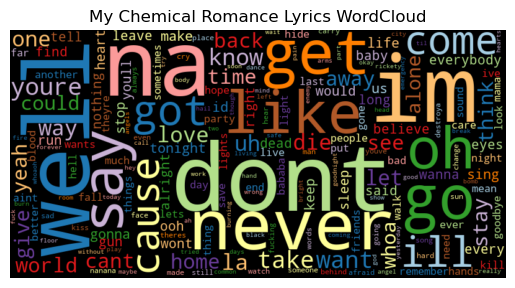

In [38]:
# let's start with My Chemical Romance
# for lyrics
mcr_lyric_freq_df = count_words(mcr_tokens, column='tokens')
wordcloud(mcr_lyric_freq_df['freq'], title="My Chemical Romance Lyrics WordCloud")
plt.show()

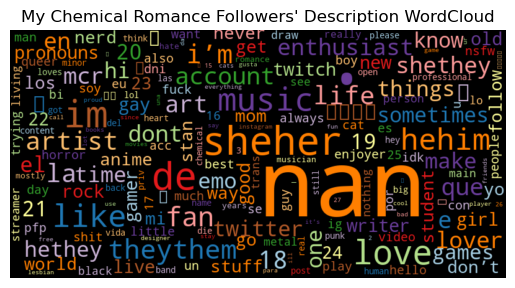

In [39]:
# My Chemical Romance
# for followers
mcr_desc_freq_df = count_words(mcr_desc_tokens, column='tokens')
wordcloud(mcr_desc_freq_df['freq'], title="My Chemical Romance Followers' Description WordCloud")
plt.show()

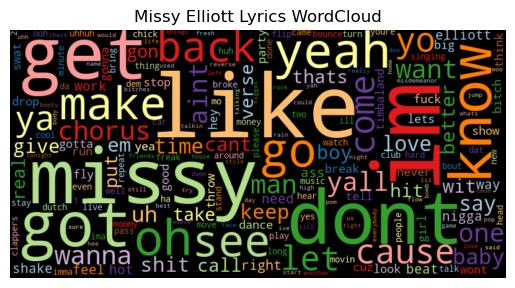

In [40]:
# now for Missy Elliott
# for lyrics
missy_lyric_freq_df = count_words(missy_tokens, column='tokens')
wordcloud(missy_lyric_freq_df['freq'], title="Missy Elliott Lyrics WordCloud")
plt.show()

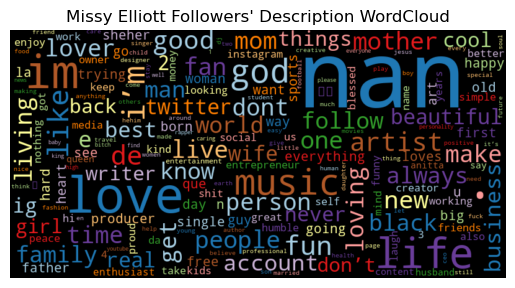

In [41]:
# Missy Elliott
# for followers
missy_desc_freq_df = count_words(missy_desc_tokens, column='tokens')
wordcloud(missy_desc_freq_df['freq'], title="Missy Elliott Followers' Description WordCloud")
plt.show()

Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: There don't tend to be complex words in the four wordclouds. In addition, at first glance, the density of which some prominent words in the lyrics wordclouds appear compared to the density of the tokens in the followers wordclouds are noticeably different. Both artists have a few largely prominent tokens in their lyrics wordclouds. The follower descriptions don't appear to show such an obvious distribution in any particular token (aside from nan).